# Triplets Final Analysis

Goal: A clean version of the triplets analysis for the paper

## Setup

In [2]:
# Import modules and R
import numpy as np, pandas as pd
import pickle
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [3]:
# Import local code
import sys
sys.path.append('../code')
import pcaVersion
from processing_helpers import *
from analysis_helpers import *
from triplets import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");

## Triplets 

In [9]:
# triplets_hcp = get_triplets(atlas=fetch_hcp())
# print("Got base triplets \n")
# triplets_hcp_3donors = get_triplets(atlas=fetch_hcp(), donors_threshold=3)
triplets_hcp_3donors = load_pickle('triplets_hcp_3donors')
print("Got 3donors triplets")

Got 3donors triplets


In [79]:
triplets_hcp_ds8 = filter_triplet_ds(triplets_hcp, 0.8)
triplets_hcp_3donors_ds8 = filter_triplet_ds(triplets_hcp_3donors, 0.8)

In [41]:
# save_pickle(triplets_hcp, 'triplets_hcp')
# save_pickle(triplets_hcp_3donors, 'triplets_hcp_3donors')

In [80]:
triplet_versions = make_triplet_versions_plot()

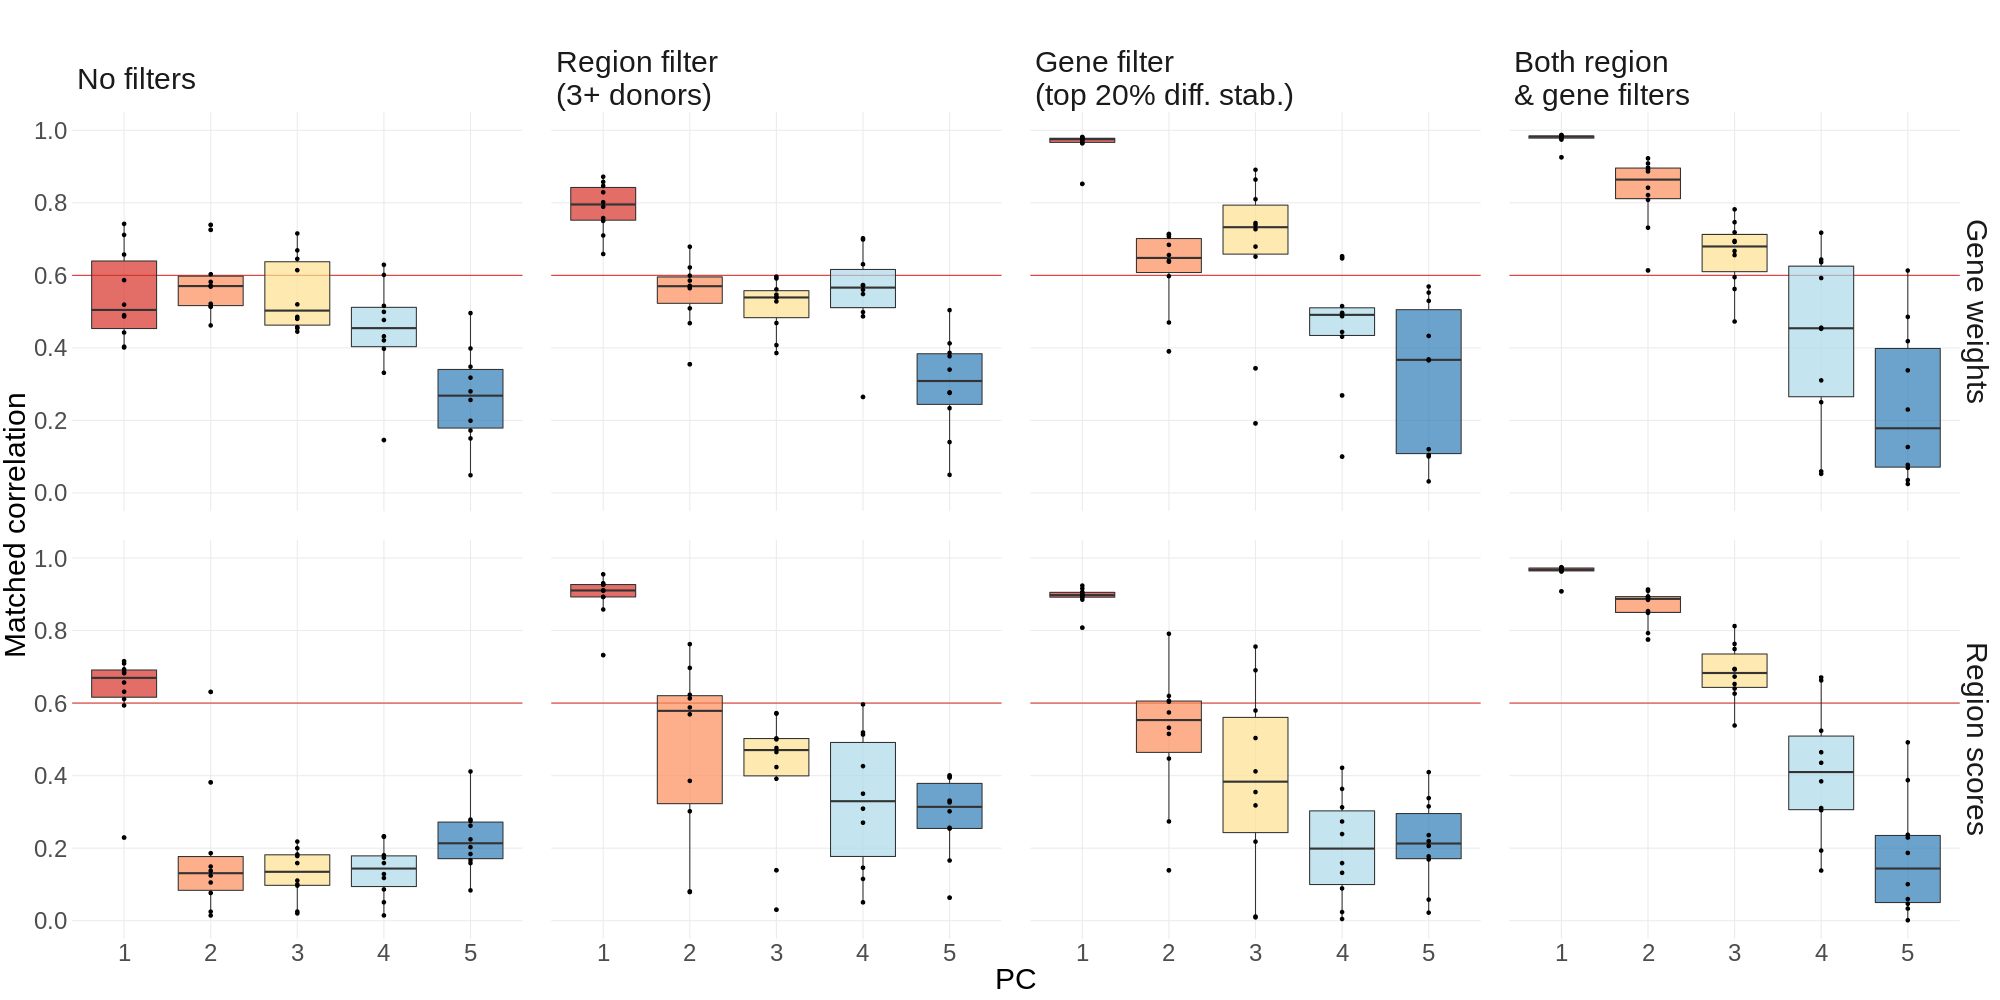

In [81]:
%%R -w 2000 -h 1000 -i triplet_versions
source("../code/Rplots.R")
plot_triplets(triplet_versions) & theme(text=element_text(size=30))

In [60]:
# triplets_hcp_brain = filter_triplet_ds(triplets_hcp, only_brain=True)
# triplets_hcp_3donors_brain = filter_triplet_ds(triplets_hcp_3donors, only_brain=True)
# triplets_hcp_ds8_brain = filter_triplet_ds(triplets_hcp, ds_threshold=0.8, only_brain=True)
# triplets_hcp_3donors_ds8_brain = filter_triplet_ds(triplets_hcp_3donors, ds_threshold=0.8, only_brain=True)

coefs_dict = {
    'No filters': disjoint_corrs(triplets_hcp_brain),
    'Region filter \n(3+ donors)': disjoint_corrs(triplets_hcp_3donors_brain),
    'Gene filter \n(top 20% diff. stab.)': disjoint_corrs(triplets_hcp_ds8_brain),
    'Both region \n& gene filters': disjoint_corrs(triplets_hcp_3donors_ds8_brain),
}

scores_dict = {
    'No filters': disjoint_corrs(triplets_hcp_brain, how='scores'),
    'Region filter \n(3+ donors)': disjoint_corrs(triplets_hcp_3donors_brain, how='scores'),
    'Gene filter \n(top 20% diff. stab.)': disjoint_corrs(triplets_hcp_ds8_brain, how='scores'),
    'Both region \n& gene filters': disjoint_corrs(triplets_hcp_3donors_ds8_brain, how='scores'),
}


triplet_versions = (
    pd.concat({'Gene weights':pd.concat(coefs_dict), 'Region scores':pd.concat(scores_dict)})
    .reset_index()
    .rename(columns={'level_0':'how', 'level_1':'version', 'level_2':'component'})
    .assign(component=lambda x: x['component'].replace({i:f'{i+1}' for i in range(5)}))
    .melt(id_vars=['how', 'version', 'component'], var_name='pair', value_name='corr')
    .assign(corr_abs = lambda x: np.abs(x['corr']))
    .assign(version = lambda x: pd.Categorical(x['version'], categories=x['version'].unique(),ordered=True))
)

AttributeError: 'pcaVersion' object has no attribute 'stability'

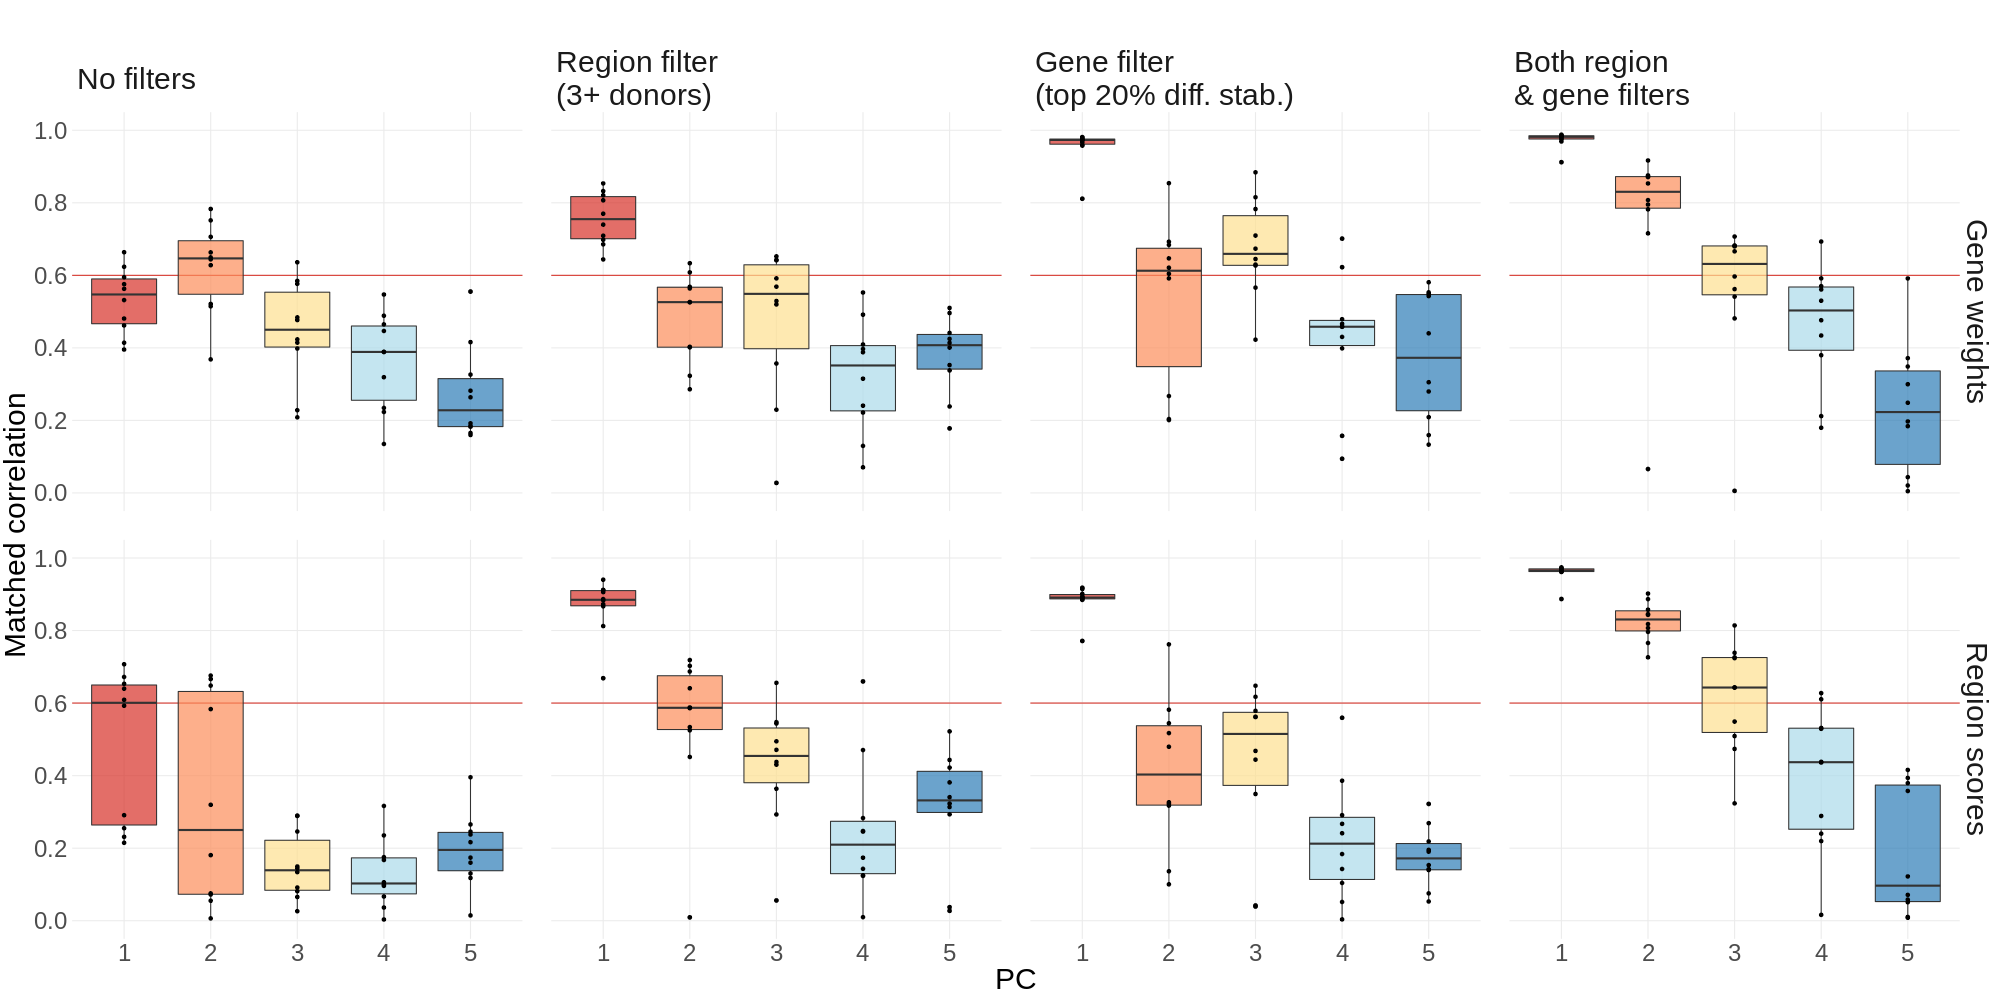

In [61]:
%%R -w 2000 -h 1000 -i triplet_versions
plot_triplets(triplet_versions) & theme(text=element_text(size=30))

In [16]:
triplets_ds_levels = {}
for ds in [i/10 for i in range(5,10)]:
     triplets_ds_levels[ds] = filter_triplet_ds(triplets_hcp_3donors, ds)

In [17]:
coefs_dict = {name:disjoint_corrs(t) for name, t in triplets_ds_levels.items()}
scores_dict = {name:disjoint_corrs(t, how='scores') for name, t in triplets_ds_levels.items()}

triplet_versions = (
    pd.concat({'Gene weights': pd.concat(coefs_dict), 'Region scores': pd.concat(scores_dict)})
    .reset_index()
    .rename(columns={'level_0':'how', 'level_1':'version', 'level_2':'component'})
    .assign(component=lambda x: x['component'].replace({i:f'{i+1}' for i in range(5)}))
    .melt(id_vars=['how', 'version', 'component'], var_name='pair', value_name='corr')
    .assign(corr_abs = lambda x: np.abs(x['corr']))
    # .assign(version = lambda x: pd.Categorical(x['version'], categories=x['version'].unique(),ordered=True))
)

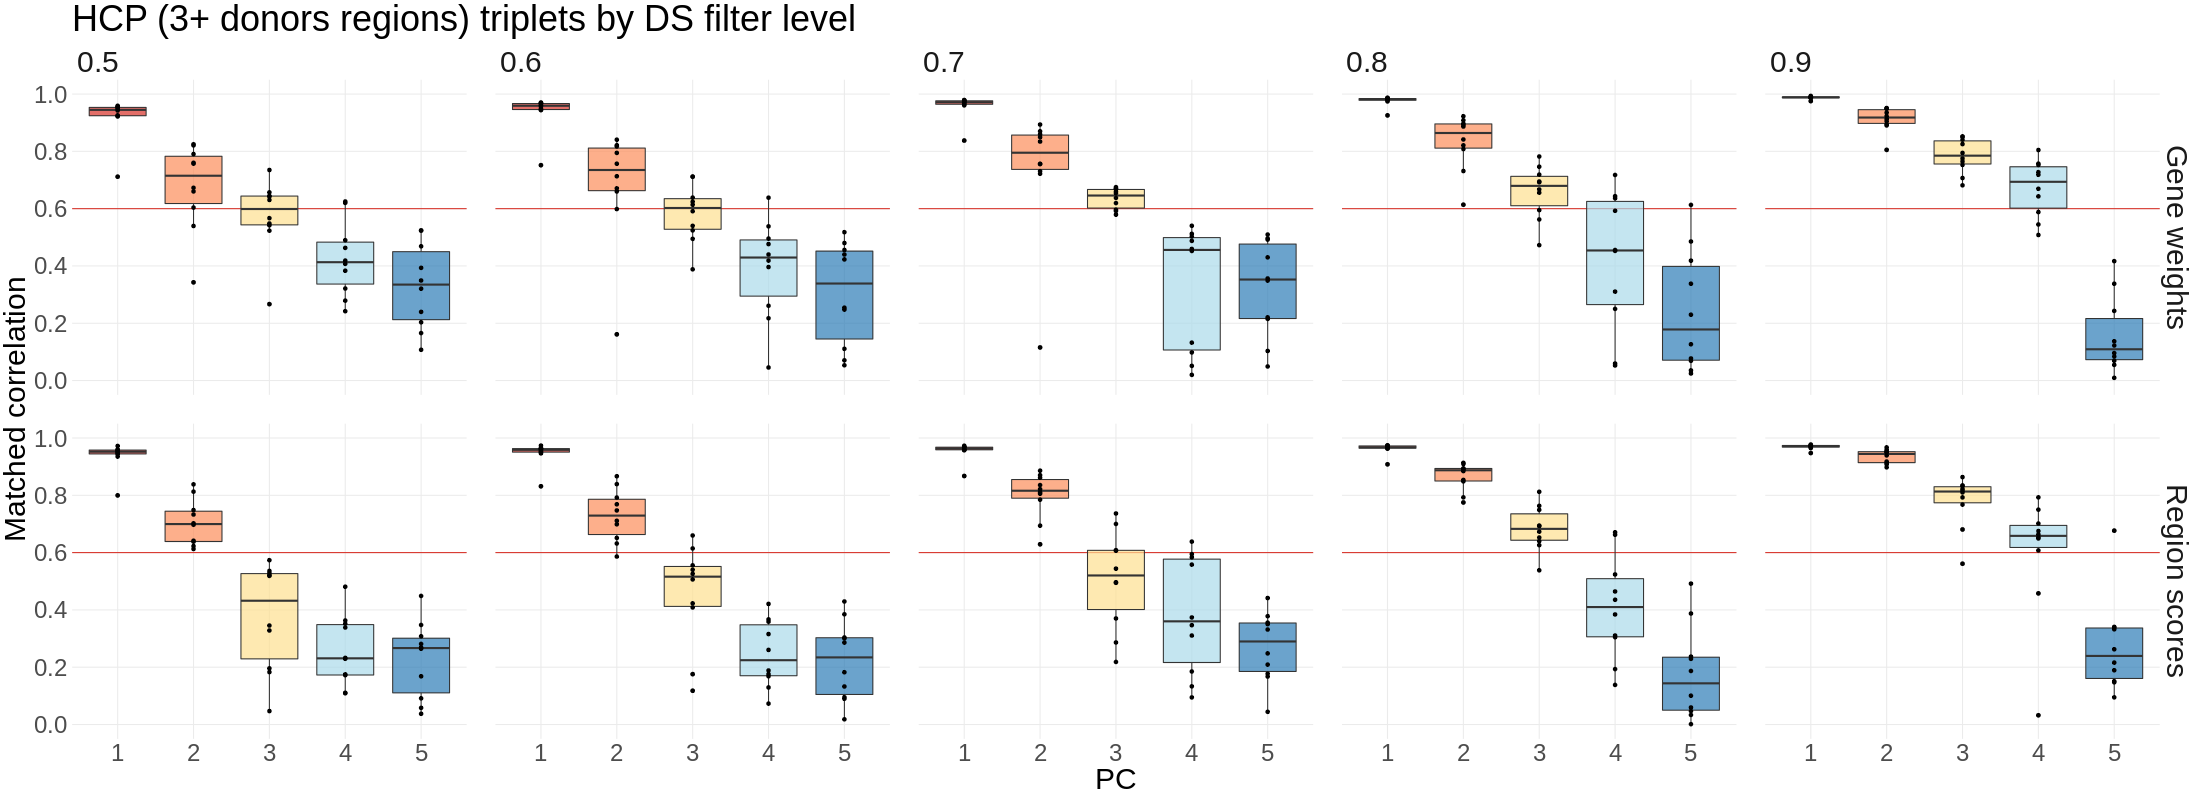

In [23]:
%%R -w 2200 -h 800 -i triplet_versions
source("../code/Rplots.R")
plot_triplets(triplet_versions) + ggtitle('HCP (3+ donors regions) triplets by DS filter level') & theme(text=element_text(size=30))

---

# DK

In [4]:
triplets_dk = get_triplets(atlas=fetch_dk())

Done triplet 012
Done triplet 013
Done triplet 014
Done triplet 015
Done triplet 023
Done triplet 024
Done triplet 025
Done triplet 034
Done triplet 035
Done triplet 045
Done triplet 123
Done triplet 124
Done triplet 125
Done triplet 134
Done triplet 135
Done triplet 145
Done triplet 234
Done triplet 235
Done triplet 245
Done triplet 345


In [8]:
save_pickle(triplets_dk, 'triplets_dk')

In [13]:
triplets_ds_levels_dk = {}
for ds in [i/10 for i in range(5,10)]:
     triplets_ds_levels_dk[ds] = filter_triplet_ds(triplets_dk, ds)

In [24]:
coefs_dict = {name:disjoint_corrs(t) for name, t in triplets_ds_levels_dk.items()}
scores_dict = {name:disjoint_corrs(t, how='scores') for name, t in triplets_ds_levels_dk.items()}

triplet_versions = (
    pd.concat({'Gene weights': pd.concat(coefs_dict), 'Region scores': pd.concat(scores_dict)})
    .reset_index()
    .rename(columns={'level_0':'how', 'level_1':'version', 'level_2':'component'})
    .assign(component=lambda x: x['component'].replace({i:f'{i+1}' for i in range(5)}))
    .melt(id_vars=['how', 'version', 'component'], var_name='pair', value_name='corr')
    .assign(corr_abs = lambda x: np.abs(x['corr']))
    # .assign(version = lambda x: pd.Categorical(x['version'], categories=x['version'].unique(),ordered=True))
)

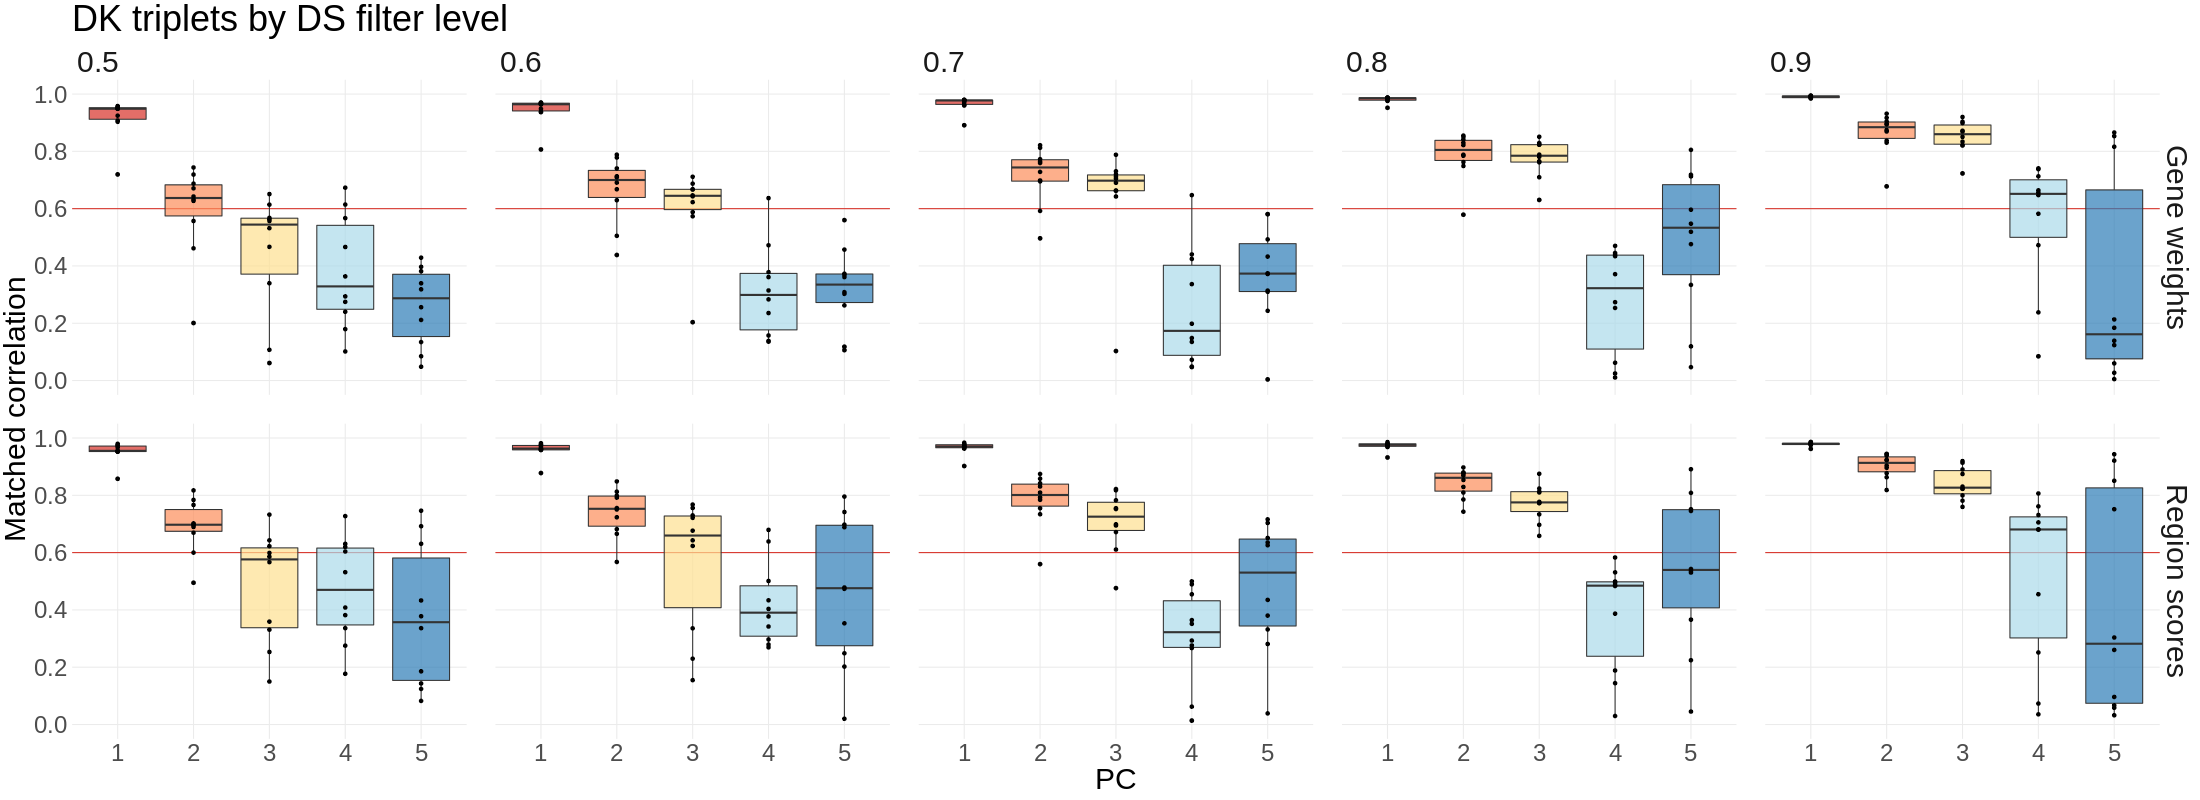

In [25]:
%%R -w 2200 -h 800 -i triplet_versions
source("../code/Rplots.R")
plot_triplets(triplet_versions) + ggtitle('DK triplets by DS filter level') & theme(text=element_text(size=30))

---

In [85]:
triplets_ds_levels_brain = {}
for ds in [i/10 for i in range(0,10)]:
     triplets_ds_levels_brain[ds] = filter_triplet_ds(triplets_hcp_3donors, ds, only_brain=True)

In [86]:
coefs_dict = {name:disjoint_corrs(t) for name, t in triplets_ds_levels_brain.items()}
scores_dict = {name:disjoint_corrs(t, how='scores') for name, t in triplets_ds_levels_brain.items()}

triplet_versions = (
    pd.concat({'Gene weights': pd.concat(coefs_dict), 'Region scores': pd.concat(scores_dict)})
    .reset_index()
    .rename(columns={'level_0':'how', 'level_1':'version', 'level_2':'component'})
    .assign(component=lambda x: x['component'].replace({i:f'{i+1}' for i in range(5)}))
    .melt(id_vars=['how', 'version', 'component'], var_name='pair', value_name='corr')
    .assign(corr_abs = lambda x: np.abs(x['corr']))
    # .assign(version = lambda x: pd.Categorical(x['version'], categories=x['version'].unique(),ordered=True))
)

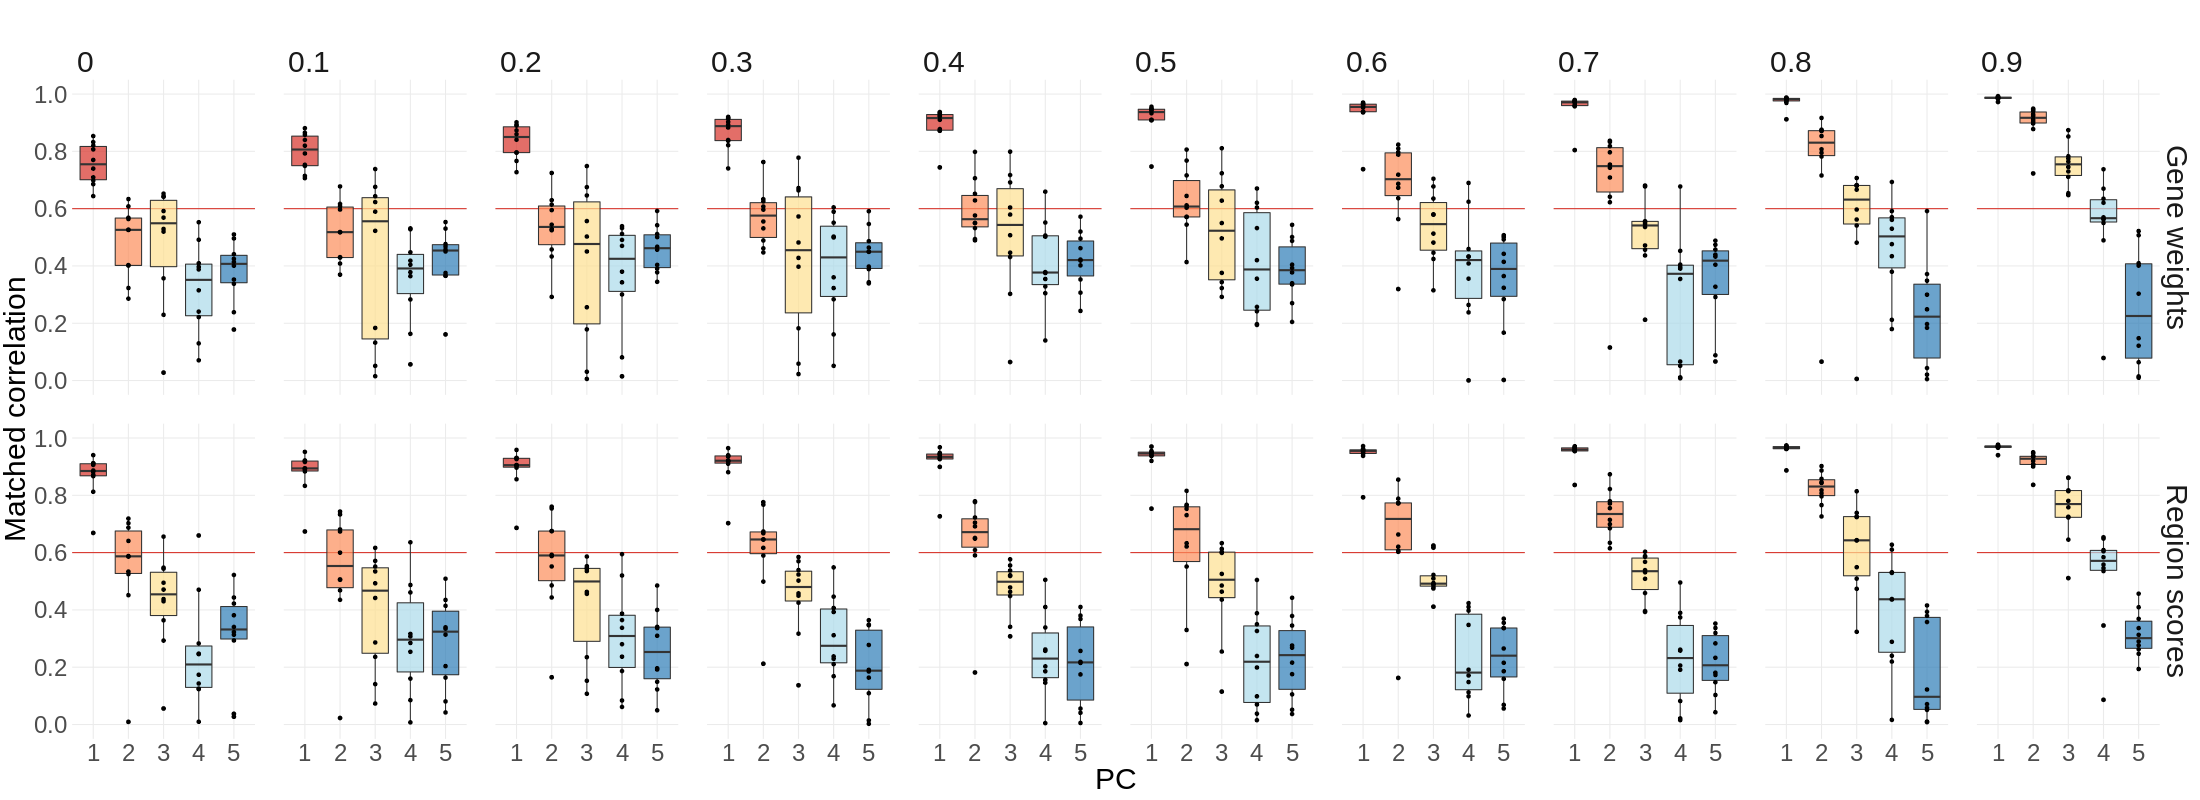

In [87]:
%%R -w 2200 -h 800 -i triplet_versions
source("../code/Rplots.R")
plot_triplets(triplet_versions) & theme(text=element_text(size=30))

---

In [80]:
def save_pickle(data, fname):
    with open('../outputs/' + fname + '.pickle', 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
# save_pickle(triplets_hcp, 'triplets_hcp')
save_pickle(triplets_3donors_hcp, 'triplets_3donors_hcp')
save_pickle(triplets_3donors_hcp_native, 'triplets_3donors_hcp_native')

In [78]:
def load_pickle(fname):
    with open('../outputs/' + fname + '.pickle', 'rb') as handle:
        return pickle.load(handle)

triplets_hcp = load_pickle('triplets_hcp')

In [69]:
triplets_hcp = {}
for name, donors in triplets_dict_donors.items():
    expression, stability = get_expression_abagen(fetch_hcp(native=False), donors=donors,
        probe_selection='diff_stability', region_agg='donors',
        lr_mirror='rightleft', #donors_threshold=3, 
        return_stability=True
    )
    triplets_hcp[name] = pcaVersion(expression, message=False)
    triplets_hcp[name].stability = stability

15666 genes remain after filtering for top 1 differential stability
15703 genes remain after filtering for top 1 differential stability
15861 genes remain after filtering for top 1 differential stability
15927 genes remain after filtering for top 1 differential stability
15568 genes remain after filtering for top 1 differential stability
15730 genes remain after filtering for top 1 differential stability
15803 genes remain after filtering for top 1 differential stability
15759 genes remain after filtering for top 1 differential stability
15838 genes remain after filtering for top 1 differential stability
16039 genes remain after filtering for top 1 differential stability
15789 genes remain after filtering for top 1 differential stability
16027 genes remain after filtering for top 1 differential stability
16118 genes remain after filtering for top 1 differential stability
15992 genes remain after filtering for top 1 differential stability
16074 genes remain after filtering for top 1 dif

In [9]:
triplets_3donors_hcp = {}
for name, donors in triplets_dict_donors.items():
    expression, stability = get_expression_abagen(fetch_hcp(native=False), donors=donors,
        probe_selection='diff_stability', region_agg='donors',
        donors_threshold=3, lr_mirror='rightleft',
        return_stability=True
    )
    triplets_3donors_hcp[name] = pcaVersion(expression, message=False)
    triplets_3donors_hcp[name].stability = stability

15666 genes remain after filtering for top 1 differential stability
15703 genes remain after filtering for top 1 differential stability
15861 genes remain after filtering for top 1 differential stability
15927 genes remain after filtering for top 1 differential stability
15568 genes remain after filtering for top 1 differential stability
15730 genes remain after filtering for top 1 differential stability
15803 genes remain after filtering for top 1 differential stability
15759 genes remain after filtering for top 1 differential stability
15838 genes remain after filtering for top 1 differential stability
16039 genes remain after filtering for top 1 differential stability
15789 genes remain after filtering for top 1 differential stability
16027 genes remain after filtering for top 1 differential stability
16118 genes remain after filtering for top 1 differential stability
15992 genes remain after filtering for top 1 differential stability
16074 genes remain after filtering for top 1 dif

In [52]:
triplets_3donors_hcp_native = {}
for name, donors in triplets_dict_donors.items():
    expression, stability = get_expression_abagen(fetch_hcp(native=True), donors=donors,
        probe_selection='diff_stability', region_agg='donors',
        donors_threshold=3, lr_mirror='rightleft',
        return_stability=True
    )
    triplets_3donors_hcp_native[name] = pcaVersion(expression, message=False)
    triplets_3donors_hcp_native[name].stability = stability

15665 genes remain after filtering for top 1 differential stability
15701 genes remain after filtering for top 1 differential stability
15861 genes remain after filtering for top 1 differential stability
15926 genes remain after filtering for top 1 differential stability
15564 genes remain after filtering for top 1 differential stability
15728 genes remain after filtering for top 1 differential stability
15803 genes remain after filtering for top 1 differential stability
15755 genes remain after filtering for top 1 differential stability
15836 genes remain after filtering for top 1 differential stability
16039 genes remain after filtering for top 1 differential stability
15787 genes remain after filtering for top 1 differential stability
16027 genes remain after filtering for top 1 differential stability
16120 genes remain after filtering for top 1 differential stability
15992 genes remain after filtering for top 1 differential stability
16075 genes remain after filtering for top 1 dif

In [20]:
def filter_triplet_ds(triplets, ds_threshold=0):
    triplets_ds = {}
    for name, triplet in triplets.items():
        mask = triplet.stability.rank(pct=True) > ds_threshold
        triplet_expression_ds = triplet.expression.loc[:, mask]
        triplets_ds[name] = pcaVersion(triplet_expression_ds, message=False)
    return triplets_ds

triplets_3donors_hcp_ds8 = filter_triplet_ds(triplets_3donors_hcp, 0.8)

Compare MNI and Native triplets across DS levels

In [100]:
triplets_ds_levels = {}
for ds in [i/10 for i in range(0,10)]:
     triplets_ds_levels[ds] = filter_triplet_ds(triplets_hcp, ds)

In [99]:
# triplets_ds_levels_3donors = triplets_ds_levels
# triplets_ds_levels_native = triplets_ds_levels

In [85]:
data_dir = "~/rds/rds-cam-psych-transc-Pb9UGUlrwWc/Cam_LIBD/AHBA_data/abagen-data/expression/"
hcp_base = pcaVersion(pd.read_csv(data_dir + 'hcp_base.csv', index_col=0))

New PCA version


In [109]:
base = None
# base = hcp_base
match = True

coefs_dict = {name:disjoint_corrs(t, base=base, match=match) for name, t in triplets_ds_levels.items()}
scores_dict = {name:disjoint_corrs(t, base=base, match=match, how='scores') for name, t in triplets_ds_levels.items()}

triplet_versions = (
    pd.concat({'Gene weights': pd.concat(coefs_dict), 'Region scores': pd.concat(scores_dict)})
    .reset_index()
    .rename(columns={'level_0':'how', 'level_1':'version', 'level_2':'component'})
    .assign(component=lambda x: x['component'].replace({i:f'{i+1}' for i in range(5)}))
    .melt(id_vars=['how', 'version', 'component'], var_name='pair', value_name='corr')
    .assign(corr_abs = lambda x: np.abs(x['corr']))
    # .assign(version = lambda x: pd.Categorical(x['version'], categories=x['version'].unique(),ordered=True))
)

MNI

DS levels, no donor filter

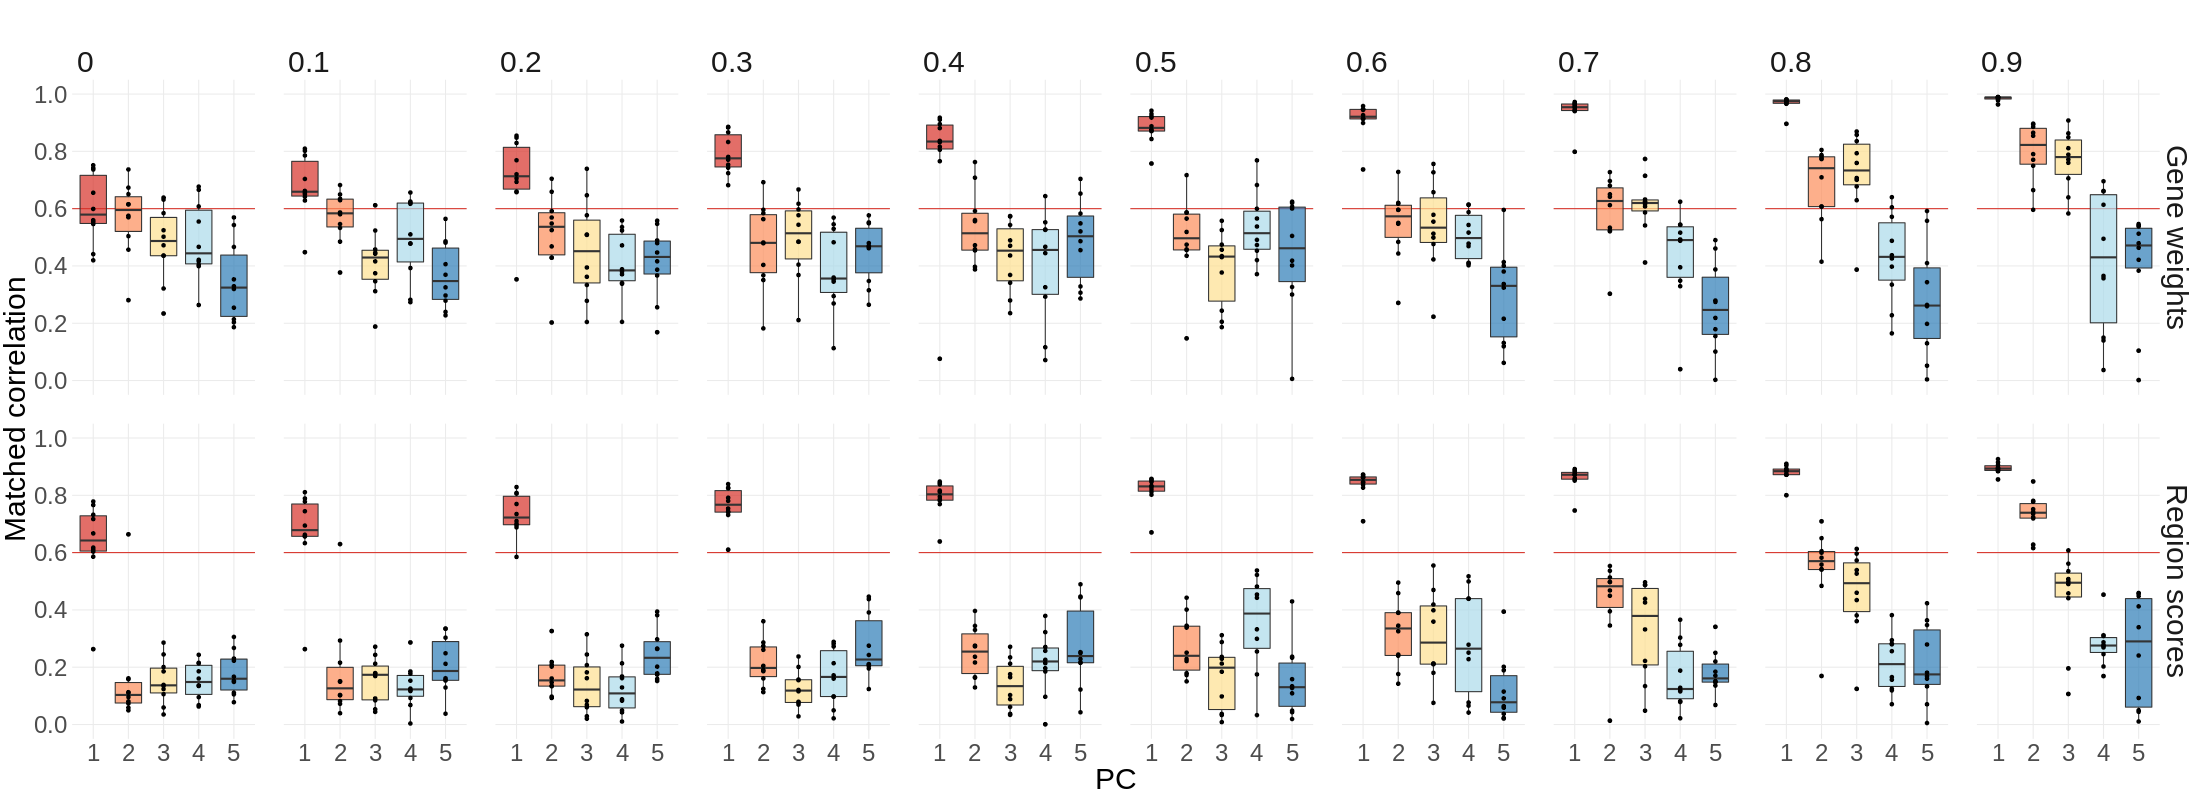

In [110]:
%%R -w 2200 -h 800 -i triplet_versions
source("../code/Rplots.R")
plot_triplets(triplet_versions) & theme(text=element_text(size=30))

3 donor filter

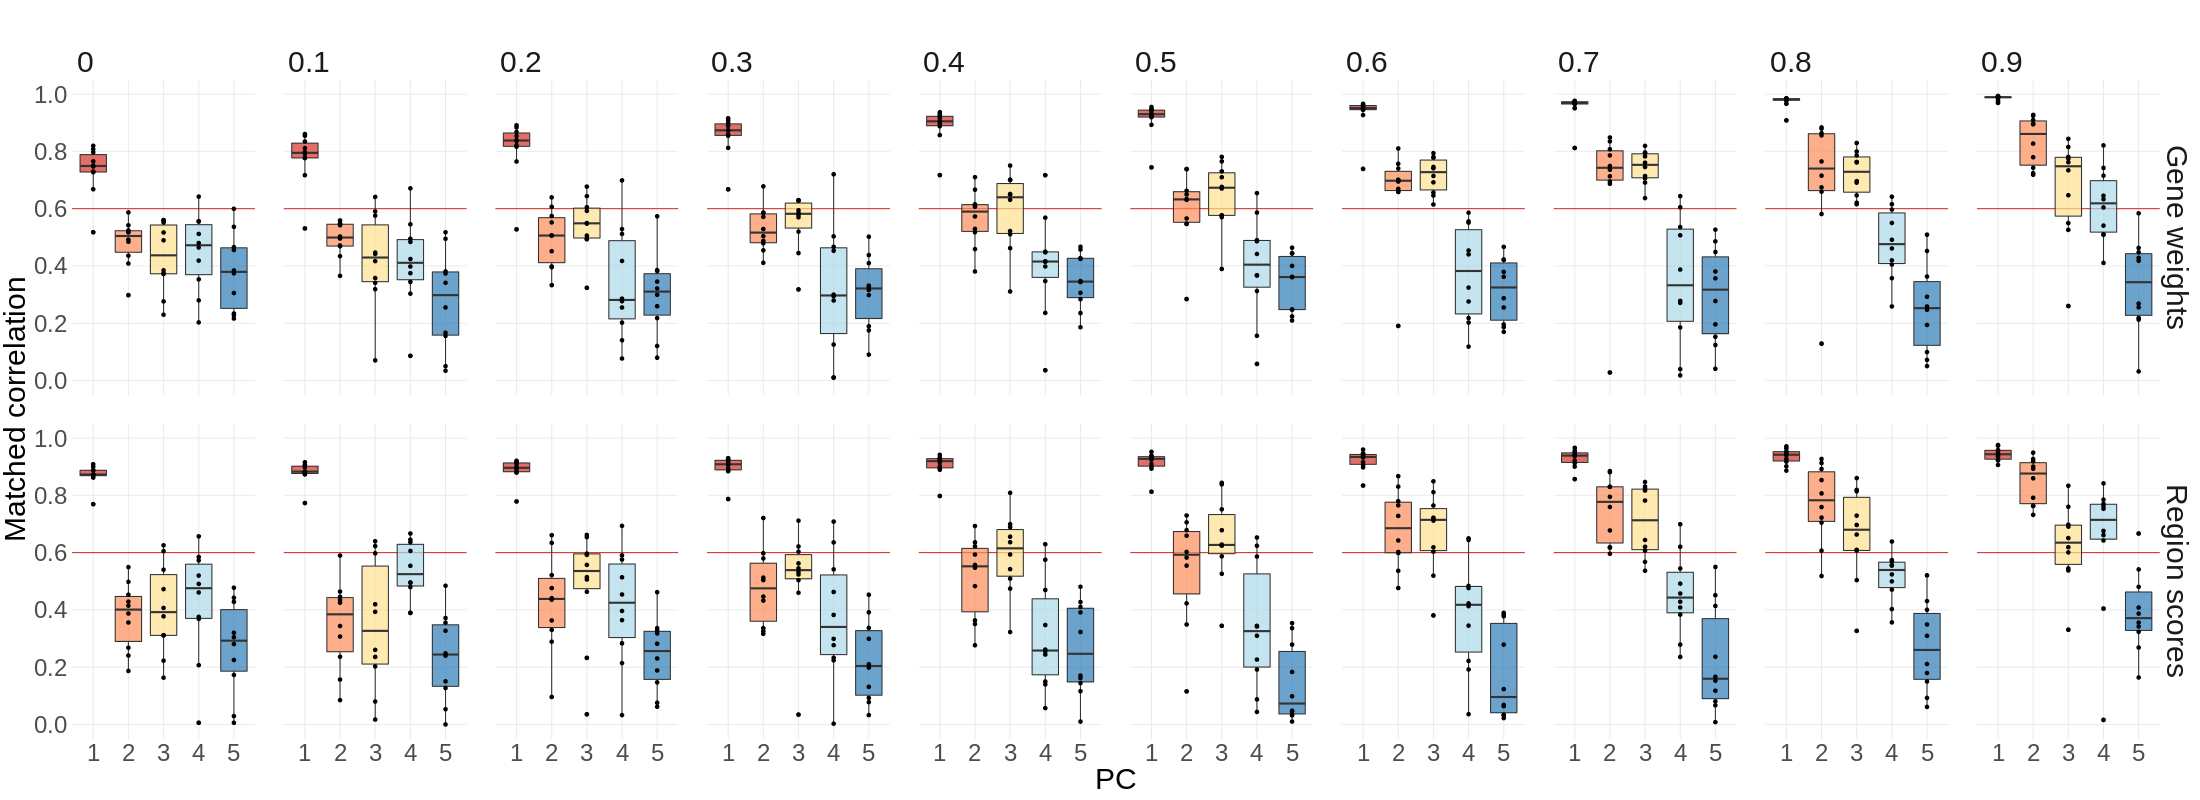

In [94]:
%%R -w 2200 -h 800 -i triplet_versions
source("../code/Rplots.R")
plot_triplets(triplet_versions) & theme(text=element_text(size=30))

Native

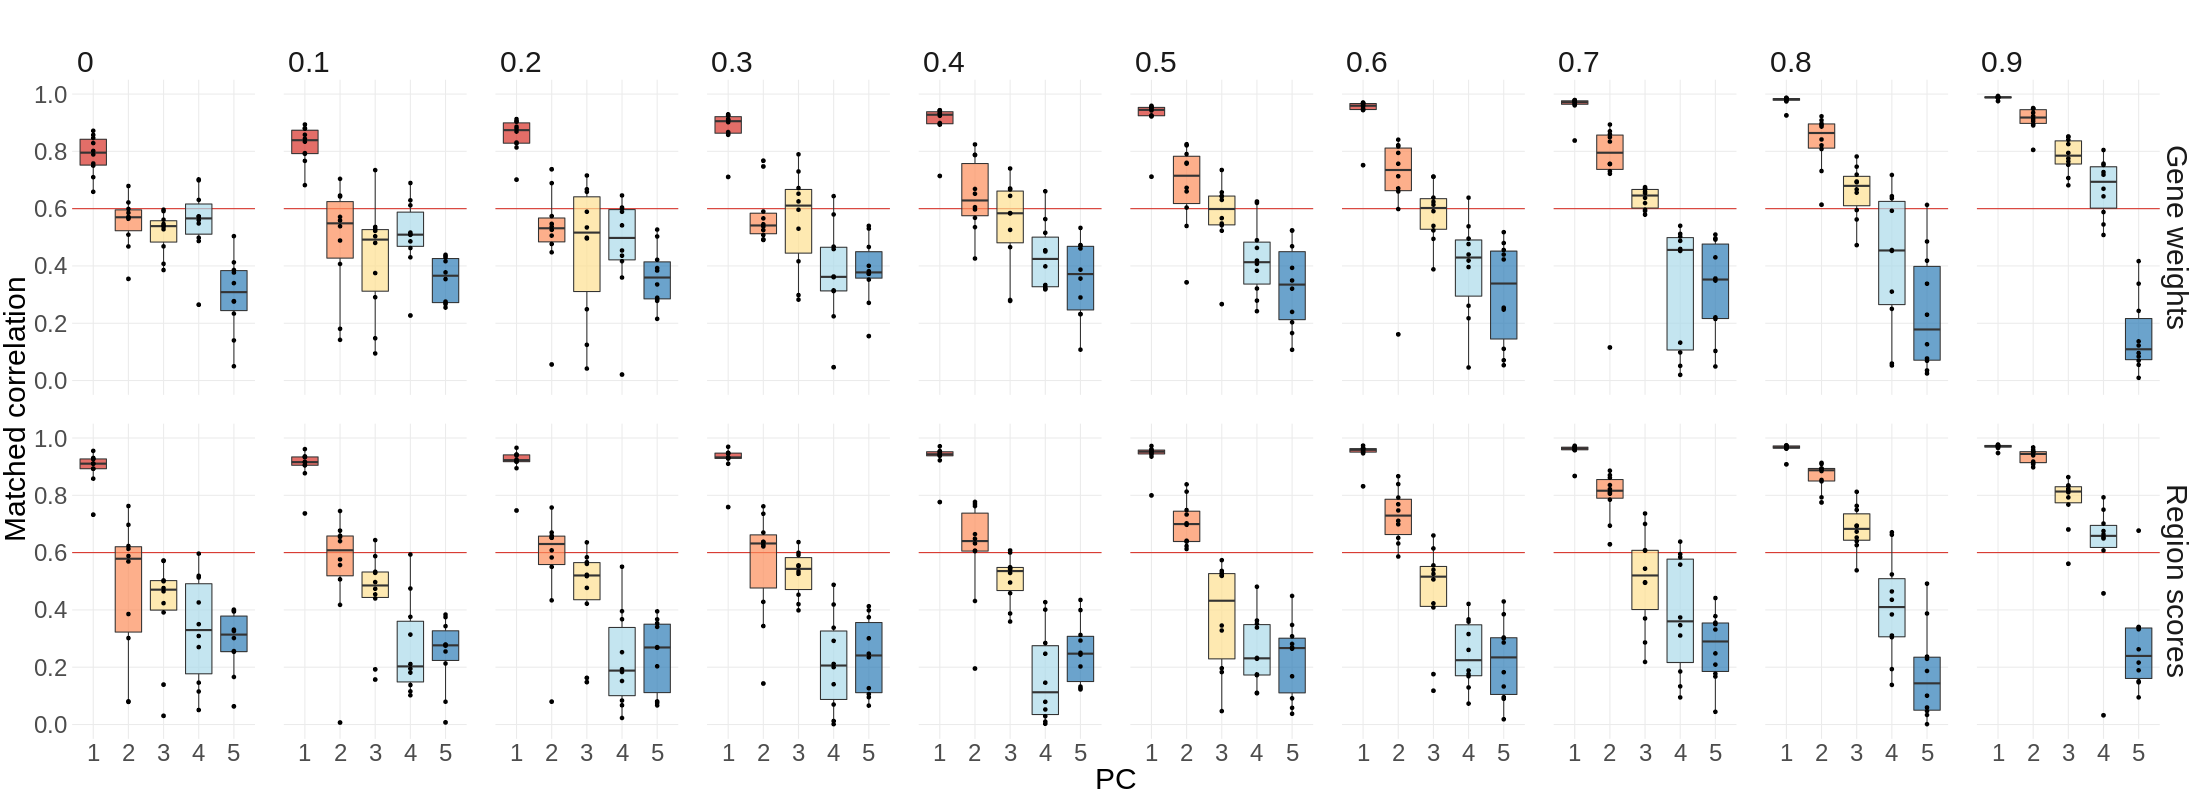

In [68]:
%%R -w 2200 -h 800 -i triplet_versions
source("../code/Rplots.R")
plot_triplets(triplet_versions) & theme(text=element_text(size=30))

Normal triplets analysis